In [1]:
# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
loans = pd.read_csv('prosperLoanData.csv')

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

In [4]:
clean_loans = loans.copy()

In [5]:
clean_loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [6]:
clean_loans= clean_loans[['LoanStatus','LoanOriginalAmount', 'Term','BorrowerAPR',
             'CreditScoreRangeLower','EstimatedReturn']]

In [7]:
clean_loans = clean_loans.dropna()
clean_loans.head()

,LoanStatus,LoanOriginalAmount,Term,BorrowerAPR,CreditScoreRangeLower,EstimatedReturn
1,Current,10000,36,0.12016,680.0,0.05470
3,Current,10000,36,0.12528,800.0,0.06000
4,Current,15000,36,0.24614,680.0,0.09066
5,Current,15000,60,0.15425,740.0,0.07077
6,Current,3000,36,0.31032,680.0,0.11070


In [8]:
clean_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 6 columns):
LoanStatus               84853 non-null object
LoanOriginalAmount       84853 non-null int64
Term                     84853 non-null int64
BorrowerAPR              84853 non-null float64
CreditScoreRangeLower    84853 non-null float64
EstimatedReturn          84853 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 4.5+ MB


In [9]:
clean_loans.LoanOriginalAmount.min(),clean_loans.LoanOriginalAmount.max()

(1000, 35000)

In [10]:
clean_loans.LoanOriginalAmount.value_counts().sort_index()

1000     761
1050       7
1080       1
1099       1
1100      41
        ... 
34000      5
34679      1
34700      1
34999      3
35000    430
Name: LoanOriginalAmount, Length: 1934, dtype: int64

In [11]:
clean_loans.Term.min(),clean_loans.Term.max()

(12, 60)

In [12]:
clean_loans.Term.value_counts().sort_index()

12     1613
36    58695
60    24545
Name: Term, dtype: int64

In [13]:
clean_loans.BorrowerAPR.min(),clean_loans.BorrowerAPR.max()

(0.04583, 0.42395)

In [14]:
clean_loans.BorrowerAPR.value_counts().sort_index() 

0.04583     1
0.04935     2
0.05335     1
0.05425     1
0.05436     1
           ..
0.40429     1
0.40679    11
0.40745     3
0.41355    44
0.42395     1
Name: BorrowerAPR, Length: 2330, dtype: int64

- It is possible to have a near zero percent APR when a bank is financing loans for third-parties. The best expample of these situations is in the instance of Auto Loans, financed at extremely low rates to incentivize a purchase.

In [15]:
clean_loans.CreditScoreRangeLower.min(),clean_loans.CreditScoreRangeLower.max()

(600.0, 880.0)

In [16]:
clean_loans.CreditScoreRangeLower.value_counts().sort_index()

600.0     1040
620.0     1653
640.0     8849
660.0    14133
680.0    14019
700.0    13610
720.0    11034
740.0     7871
760.0     5253
780.0     3705
800.0     2107
820.0     1042
840.0      398
860.0      122
880.0       17
Name: CreditScoreRangeLower, dtype: int64

In [17]:
clean_loans = clean_loans.query('CreditScoreRangeLower > 0')

In [18]:
clean_loans.CreditScoreRangeLower.value_counts().sort_index()

600.0     1040
620.0     1653
640.0     8849
660.0    14133
680.0    14019
700.0    13610
720.0    11034
740.0     7871
760.0     5253
780.0     3705
800.0     2107
820.0     1042
840.0      398
860.0      122
880.0       17
Name: CreditScoreRangeLower, dtype: int64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [19]:
title = 15
ht = 0.5
sb = 'steelblue'
ma = 'mediumaquamarine'

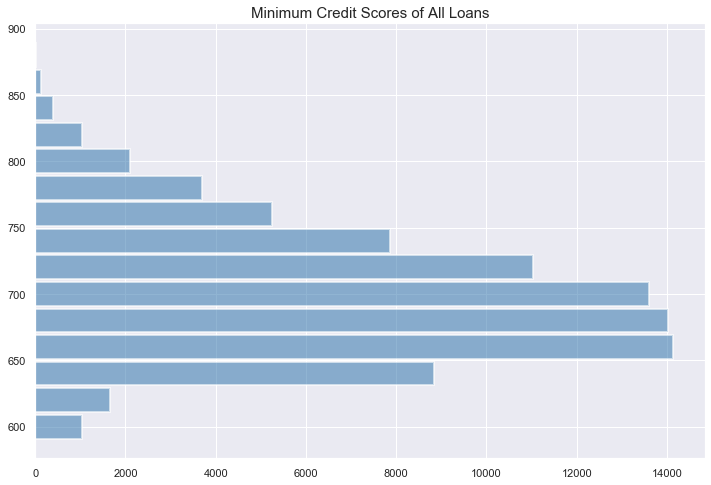

In [20]:
keys = clean_loans['CreditScoreRangeLower'].value_counts().keys()
values = clean_loans['CreditScoreRangeLower'].value_counts().values

ht = 18

y_bar = np.arange(len(keys))
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(keys, values, alpha=0.6, edgecolor='white',linewidth=2, height= ht, color=sb)
plt.title('Minimum Credit Scores of All Loans', size=title)
plt.show()

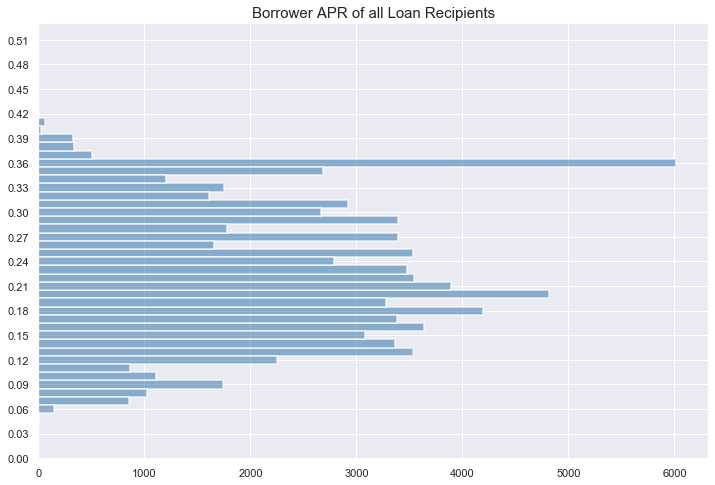

In [21]:
clean_loans['BorrowerAPR'] = round(clean_loans['BorrowerAPR'],2)

keys = clean_loans['BorrowerAPR'].value_counts().keys()
values = clean_loans['BorrowerAPR'].value_counts().values
ht = 0.01

y_bar = np.arange(len(keys))
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(keys, values, alpha=0.6, edgecolor='white',linewidth=2, height= ht, color=sb)
plt.ylim(0, .53)
plt.yticks(np.arange(0, 0.53, step=.03))
plt.title('Borrower APR of all Loan Recipients', size=title)
plt.show()


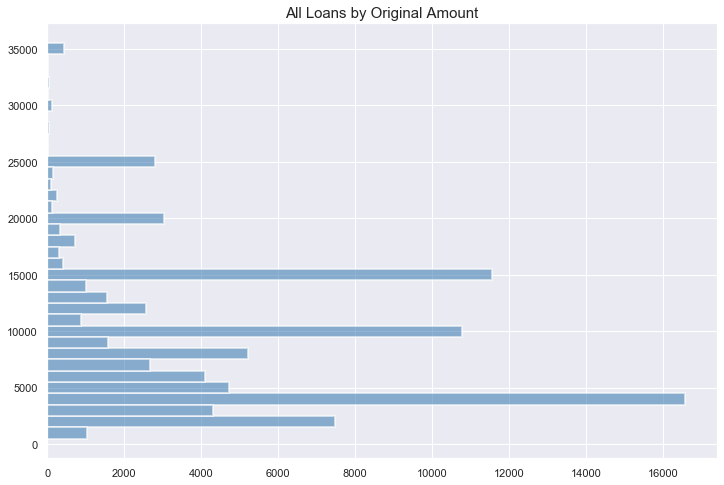

In [22]:
clean_loans['LoanOriginalAmount'] = round(clean_loans['LoanOriginalAmount'], -3)
keys = clean_loans['LoanOriginalAmount'].value_counts().keys()
values = clean_loans['LoanOriginalAmount'].value_counts().values

ht = 1000

y_bar = np.arange(len(keys))
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(keys, values, alpha=0.6, edgecolor='white',linewidth=2, height= ht, color=sb)
plt.title('All Loans by Original Amount', size=title)
plt.show()

Text(0.5, 1.0, 'Distribution of Borrower APR for All Loans')

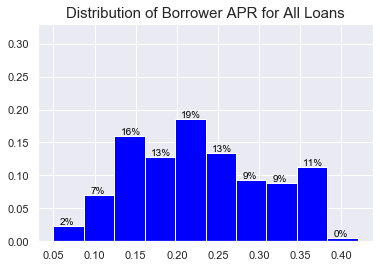

In [23]:
weights_df=np.ones(len(clean_loans)) / len(clean_loans)

counts, bins, bars = plt.hist(clean_loans['BorrowerAPR'], weights=weights_df, bins=10,color='blue')
plt.ylim(0,.22)
for i in range(len(counts)):
    val = counts[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+0.0075,counts[i]+.002, s=f"{val:.0f}%",color='black')
plt.ylim(0,.33)
plt.title('Distribution of Borrower APR for All Loans',size=title)

Text(0.5, 1.0, 'Distribution of Original Loan Amount for All Loans')

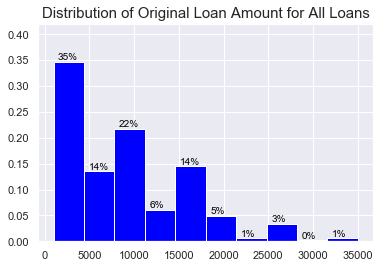

In [24]:
counts, bins, bars = plt.hist(clean_loans['LoanOriginalAmount'], weights=weights_df, bins=10,color='blue')

for i in range(len(counts)):
    val = counts[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+500,counts[i]+.004, s=f"{val:.0f}%",color='black')
plt.ylim(0,.42)
plt.title('Distribution of Original Loan Amount for All Loans',size=title)

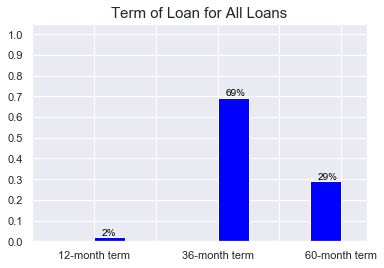

In [25]:
counts, bins, bars = plt.hist(clean_loans['Term'], weights=weights_df, bins=8,color='blue')

for i in range(len(counts)):
    val = counts[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+1.5,counts[i]+.01, s=f"{val:.0f}%",color='black')


plt.ylim(0,1.05)
plt.xlim(0,65)
plt.yticks(np.arange(0, 1+.05, step=0.1))
plt.xticks(np.arange(0,60+2,12),labels=['','12-month term','','36-month term','','60-month term'])
plt.title('Term of Loan for All Loans',size=title);

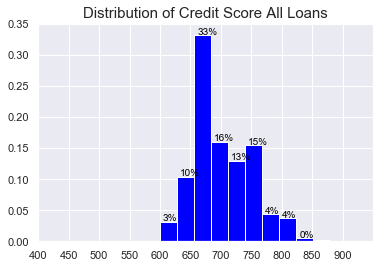

In [26]:
counts, bins, bars = plt.hist(clean_loans['CreditScoreRangeLower'], weights=weights_df, bins=10,color='blue')


for i in range(len(counts)):
    val = counts[i]*100
    if val < .4:
        pass
    else:
        plt.text(bins[i]+5,counts[i]+.001, s=f"{val:.0f}%",color='black')
plt.xlim(400,950)
plt.ylim(0,.35)
plt.yticks(np.arange(0,.35+.01,step=.05))
plt.xticks(np.arange(400,950,step=50))
plt.title('Distribution of Credit Score All Loans',size=title);

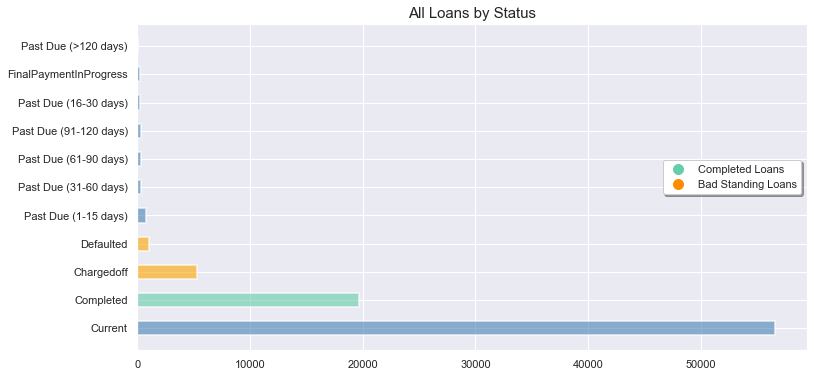

In [27]:
title = 15
keys = clean_loans['LoanStatus'].value_counts().keys()
values = clean_loans['LoanStatus'].value_counts().values
ht = 0.5
sb = 'steelblue'
ma = 'mediumaquamarine'

y_bar = np.arange(len(keys))
fig, ax = plt.subplots(figsize=(12,6))
ax.barh(keys, values, alpha=0.6, edgecolor='white',linewidth=2, height= ht, 
        color=[sb,ma,'orange','orange',sb,sb,sb,sb,sb,sb,sb,sb])
plt.title('All Loans by Status', size=title)

colors = ["mediumaquamarine", "darkorange"]
texts = ["Completed Loans", "Bad Standing Loans"]

patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(1, .6),shadow=True);

plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [28]:
#size=15

In [29]:
complete_loans = clean_loans.query("LoanStatus == 'Completed'")
badloans = clean_loans.query("LoanStatus == 'Defaulted'" or "LoanStatus == 'Chargedoff'" )

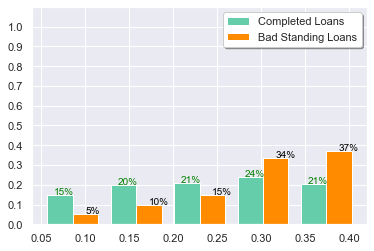

In [30]:
sns.set_style('darkgrid')


weights_df=np.ones(len(badloans)) / len(badloans)
weights_cl=np.ones(len(complete_loans)) / len(complete_loans)

x = complete_loans['BorrowerAPR']
y = badloans['BorrowerAPR']


counts, bins, bars= plt.hist([x, y], label=['Completed Loans','Bad Standing Loans'],
                             bins=5 ,weights=[weights_cl,weights_df],
         color=['mediumaquamarine','darkorange'])

counts_0 = counts[0]
counts_1 = counts[1]


for i in range(len(counts_0)):
    val = counts_0[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+0.015,counts_0[i]+.002, s=f"{val:.0f}%",color='green')
        
for i in range(len(counts_1)):
    val = counts_1[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+0.05,counts_1[i]+.002, s=f"{val:.0f}%",color='black')
        
               
        
plt.ylim(0,1.1)
plt.yticks(np.arange(0,1+.01,.1))
plt.legend(loc='upper right',facecolor='white',shadow=True);

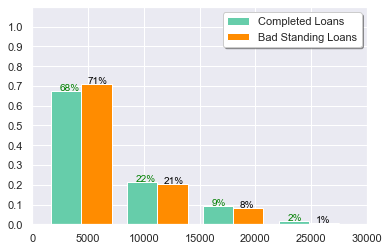

In [31]:
x = complete_loans['LoanOriginalAmount']
y = badloans['LoanOriginalAmount']

counts, bins, bars = plt.hist([x, y], label=['Completed Loans','Bad Standing Loans'], bins=5, weights=[weights_cl,weights_df],
         color=['mediumaquamarine','darkorange'])


counts_0 = counts[0]
counts_1 = counts[1]

for i in range(len(counts_0)):
    val = counts_0[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+1500,counts_0[i]+.002, s=f"{val:.0f}%",color='green')
        
for i in range(len(counts_1)):
    val = counts_1[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+4000,counts_1[i]+.002, s=f"{val:.0f}%",color='black')   


plt.xlim(0,30000)
plt.ylim(0,1.1)
plt.yticks(np.arange(0,1+.01,.1))
plt.legend(loc='upper right',facecolor='white',shadow=True);

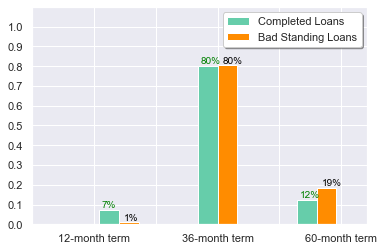

In [32]:
size=12
x = complete_loans['Term']
y = badloans['Term']
counts, bins, bars = plt.hist([x, y], label=['Completed Loans','Bad Standing Loans'],  bins=5, weights=[weights_cl,weights_df],
        color=['mediumaquamarine','darkorange'])


counts_0 = counts[0]
counts_1 = counts[1]

for i in range(len(counts_0)):
    val = counts_0[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+1.5,counts_0[i]+.01, s=f"{val:.0f}%",color='green')
        
for i in range(len(counts_1)):
    val = counts_1[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+5.8,counts_1[i]+.01, s=f"{val:.0f}%",color='black')  

plt.xlim(0,65)
plt.xticks(np.arange(0,60+2,12),labels=['','12-month term','','36-month term','','60-month term'])
plt.ylim(0,1.1)
plt.yticks(np.arange(0,1+.1,0.1))

plt.legend(loc='upper right',facecolor='white',shadow=True)

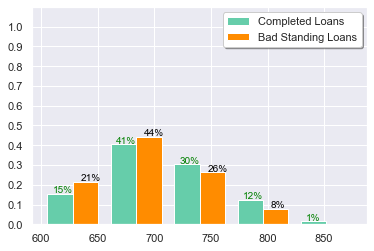

In [33]:
x = complete_loans['CreditScoreRangeLower']
y = badloans['CreditScoreRangeLower']
counts, bins, bars = plt.hist([x, y], label=['Completed Loans', 'Bad Standing Loans'], bins=5, weights=[weights_cl,weights_df],
        color=['mediumaquamarine','darkorange'])

counts_0 = counts[0]
counts_1 = counts[1]

for i in range(len(counts_0)):
    val = counts_0[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+10
                 ,counts_0[i]+.005, s=f"{val:.0f}%",color='green')
        
for i in range(len(counts_1)):
    val = counts_1[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+35,counts_1[i]+.005, s=f"{val:.0f}%",color='black') 

plt.ylim(0,1.1)
plt.yticks(np.arange(0,1+.01,.1))
plt.legend(loc='upper right', facecolor='white',shadow=True);

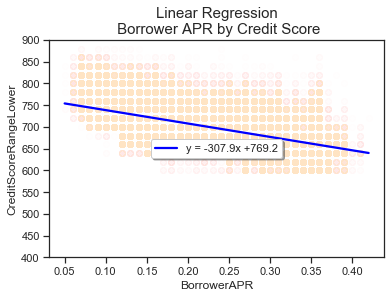

In [34]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_loans['BorrowerAPR'],clean_loans['CreditScoreRangeLower'])
slope = round(slope,1)
intercept = round(intercept,1)

ax =sns.regplot(x=clean_loans['BorrowerAPR'],y=clean_loans['CreditScoreRangeLower'], scatter_kws={'color':'bisque','alpha':0.009},
           line_kws={'color':'blue', 'label': f"y = {slope}x +{intercept}"},truncate=True)
plt.ylim(400,900)
plt.yticks(np.arange(400,900+1,50))

ax.legend(loc=10,facecolor='white',shadow=True)
plt.title('Linear Regression\n Borrower APR by Credit Score',size=title);

''

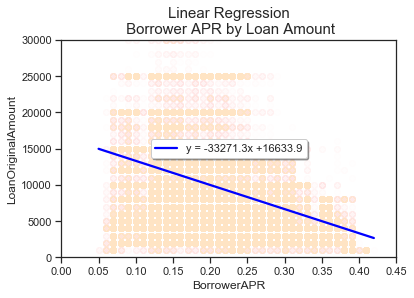

In [35]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_loans['BorrowerAPR'],clean_loans['LoanOriginalAmount'])
slope = round(slope,1)
intercept = round(intercept,1)

ax = sns.regplot(x=clean_loans['BorrowerAPR'],y=clean_loans['LoanOriginalAmount'], scatter_kws={'color':'bisque','alpha':0.009},
            line_kws={'color':'blue', 'label': f"y = {slope}x +{intercept}"}, truncate=True)

plt.xlim(0,.45)
plt.ylim(0,30000)
plt.yticks(np.arange(0,30000+1, 5000))
plt.title('Linear Regression\n Borrower APR by Loan Amount',size=title)
ax.legend(loc=10,shadow=True)
;

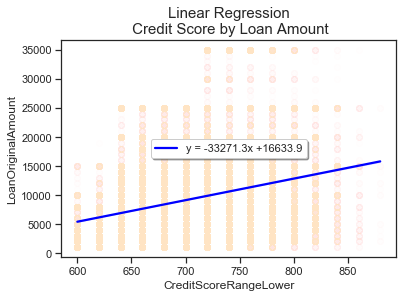

In [36]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_loans['BorrowerAPR'],clean_loans['LoanOriginalAmount'])
slope = round(slope,1)
intercept = round(intercept,1)

ax = sns.regplot(x=clean_loans['CreditScoreRangeLower'],y=clean_loans['LoanOriginalAmount'], scatter_kws={'color':'bisque','alpha':0.009},
          line_kws={'color':'blue', 'label': f"y = {slope}x +{intercept}"}, truncate=True);
plt.title('Linear Regression\n Credit Score by Loan Amount', size=title)
ax.legend(loc=10,shadow=True)
plt.show()

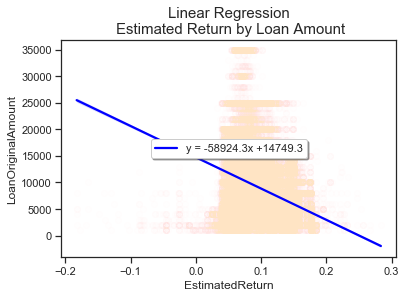

In [37]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_loans['EstimatedReturn'],clean_loans['LoanOriginalAmount'])
slope = round(slope,1)
intercept = round(intercept,1)

ax = sns.regplot(x=clean_loans['EstimatedReturn'],y=clean_loans['LoanOriginalAmount'], scatter_kws={'color':'bisque','alpha':0.009},
          line_kws={'color':'blue', 'label': f"y = {slope}x +{intercept}"}, truncate=True);
plt.title('Linear Regression\n Estimated Return by Loan Amount',size=title)
ax.legend(loc=10,shadow=True)
plt.show()

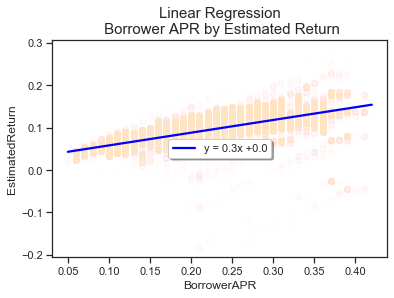

In [38]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_loans['BorrowerAPR'],clean_loans['EstimatedReturn'])
slope = round(slope,1)
intercept = round(intercept,1)

ax = sns.regplot(x=clean_loans['BorrowerAPR'],y=clean_loans['EstimatedReturn'], scatter_kws={'color':'bisque','alpha':0.009},
          line_kws={'color':'blue', 'label': f"y = {slope}x +{intercept}"}, truncate=True);
plt.title('Linear Regression\n Borrower APR by Estimated Return',size=title)
ax.legend(loc=10,shadow=True)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [39]:
loan_standing  = clean_loans.copy()

In [40]:
loan_standing.loc[(loan_standing['LoanStatus'] == 'Defaulted'),'LoanStatus']='Bad Standing'
loan_standing.loc[(loan_standing['LoanStatus'] == 'Chargedoff'),'LoanStatus']='Bad Standing'

In [41]:
loan_category = loan_standing.query("LoanStatus == 'Completed' or LoanStatus == 'Bad Standing'")
complete_reg = loan_standing.query("LoanStatus == 'Completed'")
default_reg = loan_standing.query("LoanStatus == 'Bad Standing'")
loan_category.LoanStatus.value_counts()

Completed       19664
Bad Standing     6341
Name: LoanStatus, dtype: int64

<Figure size 576x432 with 0 Axes>

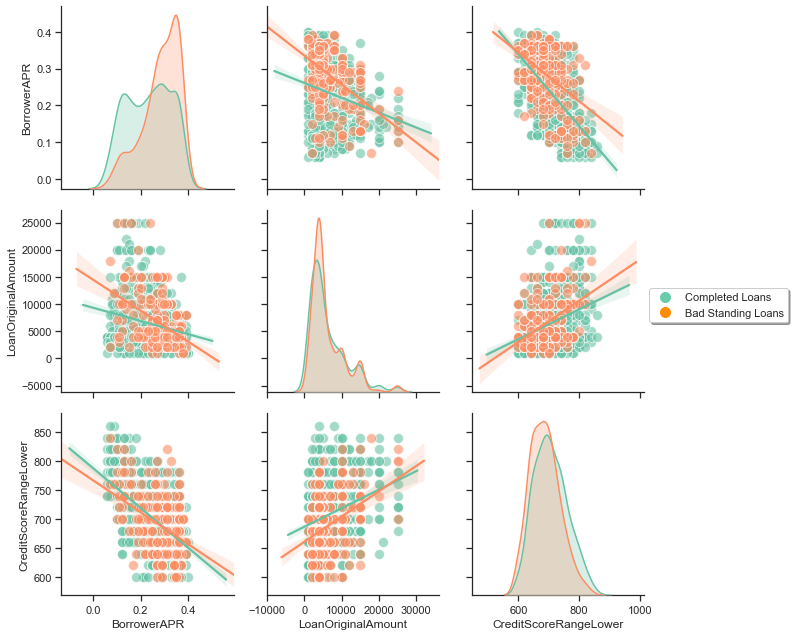

In [42]:
sns.set_style('ticks')
fig = plt.figure(figsize=(8,6))


ln = sns.pairplot(loan_category.sample(1000),vars = ['BorrowerAPR', 'LoanOriginalAmount', 'CreditScoreRangeLower'], kind='reg',
            plot_kws=dict(scatter_kws=dict(alpha =0.6, s = 100,edgecolor='white')), hue="LoanStatus", palette="Set2", height=3)
ln._legend.remove()
colors = ["mediumaquamarine", "darkorange"]
texts = ["Completed Loans", "Bad Standing Loans"]

patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(1, .6),shadow=True);


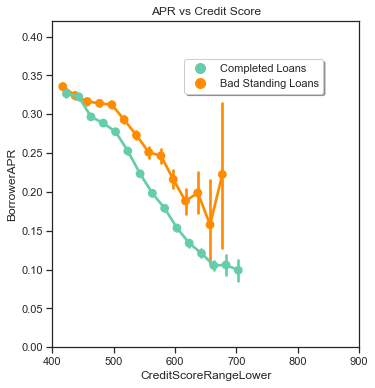

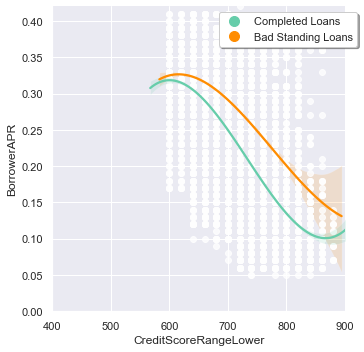

In [43]:
sns.set_style('ticks')
plt.figure(figsize = [5.5, 6])
sns.pointplot(data = loan_category, x = 'CreditScoreRangeLower', y = 'BorrowerAPR', hue = 'LoanStatus',
                  dodge = 0.3, palette=['darkorange','mediumaquamarine'])

plt.title('APR vs Credit Score')
plt.xlim(-1,24)
plt.xticks(np.arange(-1,24+1,5),labels=['400','500','600','700','800','900'])
plt.ylim(0,.42)

plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(.9, .9),shadow=True);

sns.set_style('darkgrid')
sns.lmplot(x = 'CreditScoreRangeLower', y = 'BorrowerAPR', hue="LoanStatus", data=loan_category,palette=['darkorange','mediumaquamarine'],
          scatter_kws={'color':'white'}, legend=False, order=3)
plt.xlim(400,900)
plt.ylim(0,.42)
plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(.55, .85),shadow=True);

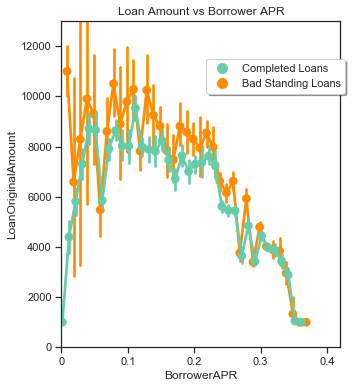

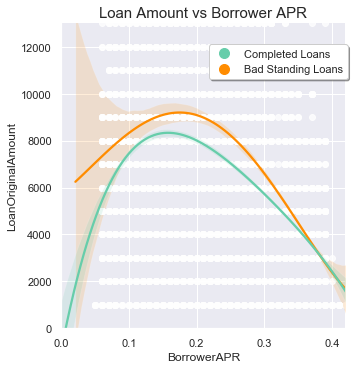

In [44]:
sns.set_style('ticks')

plt.figure(figsize = [5, 6])
sns.pointplot(data = loan_category, x = 'BorrowerAPR', y = 'LoanOriginalAmount', hue = 'LoanStatus',
                  dodge = 0.3, palette=['darkorange','mediumaquamarine'],legend=False)

plt.title('Loan Amount vs Borrower APR')
plt.xticks([0,10,20,30,40], [0,0.1, .2, .3, 0.4])
plt.xlim(0,42)
plt.ylim(0,13000)

plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(.5, .9),shadow=True);



sns.set_style('darkgrid')
sns.lmplot(x = 'BorrowerAPR', y = 'LoanOriginalAmount', hue="LoanStatus", data=loan_category,palette=['darkorange','mediumaquamarine'],
          scatter_kws={"color": 'white'},legend=False, order=4)
plt.title('Loan Amount vs Borrower APR',size= 15)
plt.ylim(0,13000)
plt.xlim(0,.42)

plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(.5, .8),shadow=True);

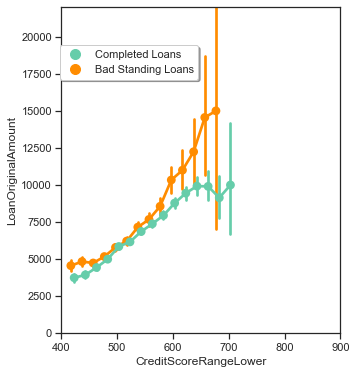

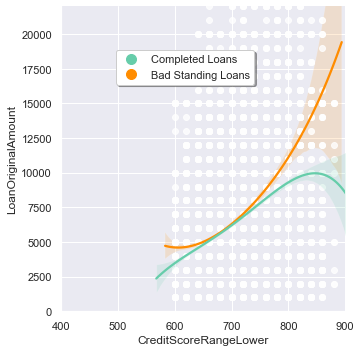

In [45]:
sns.set_style('ticks')
plt.figure(figsize = [5, 6])
sns.pointplot(data = loan_category, x = 'CreditScoreRangeLower', y = 'LoanOriginalAmount', hue = 'LoanStatus',
                  dodge = 0.3, palette=['darkorange','mediumaquamarine'],legend=False)
plt.xlim(-1,24)
plt.xticks(np.arange(-1,24+1,5),labels=['400','500','600','700','800','900'])
plt.ylim(0,22000)
plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(.51, .9),shadow=True);
sns.set_style('darkgrid')
sns.lmplot(x = 'CreditScoreRangeLower', y = 'LoanOriginalAmount', hue="LoanStatus", data=loan_category,palette=['darkorange','mediumaquamarine'],
          scatter_kws={'color':'white'}, order=4, legend=False)
plt.xlim(400,900)
plt.ylim(0,22000)
plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(.7, .8),shadow=True);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

- https://seaborn.pydata.org/generated/seaborn.lmplot.html
- https://stackoverflow.com/questions/14032521/python-data-structure-sort-list-alphabetically
- https://stackoverflow.com/questions/44098362/using-mpatches-patch-for-a-custom-legend
- https://stackoverflow.com/questions/27019079/move-seaborn-plot-legend-to-a-different-position
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
- https://matplotlib.org/stable/gallery/color/named_colors.html
- https://stackoverflow.com/questions/54781243/hide-legend-from-seaborn-pairplot